In [1]:
import numpy as np
import matplotlib.pyplot as plt

############### Define Models ###################

# Gaussian intensity profile
def I(P,W,r):
    
    I = (P/(np.pi*W**2/2)) * np.exp(-2*r**2/W**2)
    
    return I

#P = power
#W = FWHM
#r = radial distance

# Overlap array
def overlap(Pc,Ps,Wc,Ws,r):
    
    eta = np.sum(I(Pc,Wc,r) * I(Ps,Ws,r))
    
    return eta

# Normalisation constant
def C(Pc,Ps,Wc,Ws,r):
    
    C = 1 / np.sum(I(Pc,Wc,r) * I(Ps,Ws,r))
    
    return C

In [2]:
################### Set Parameters #####################

Wb = 2              # Bulk width
Ww = Wb/10           # Waveguide width
Pcb = 5             # Control power in bulk
Psb = Pcb/1000        # Single-photon power in bulk

# Normalize rabi-freq when coupling into waveguide 
Pcw = Pcb * Ww**2 / Wb**2 #* np.exp(1/Wb**2 - 1/Ww**2)
Psw = Psb #* Ww**2 / Wb**2 * np.exp(1/Wb**2 - 1/Ww**2)

r = np.linspace(-3,3,100)   # radial range

Bulk Coupling Efficiency =  1.0
Waveguide Coupling Efficiency =  0.7106335201745528


([], [])

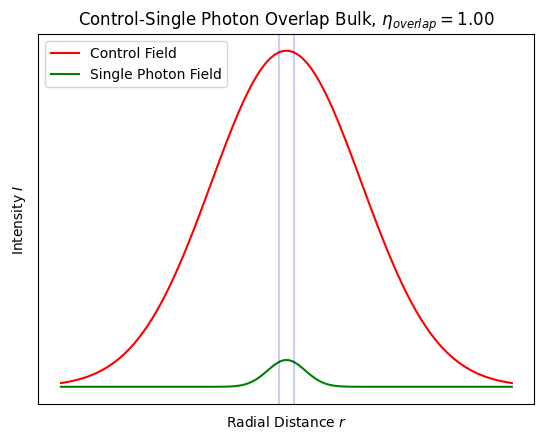

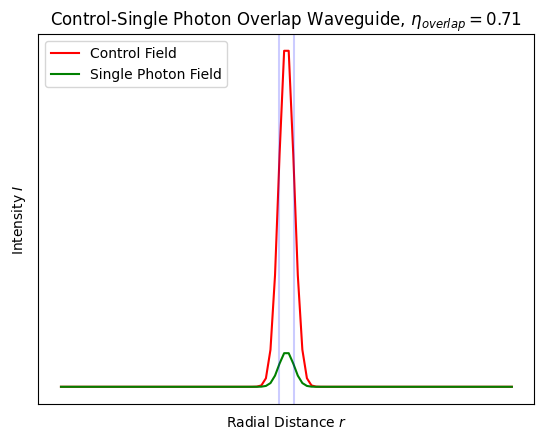

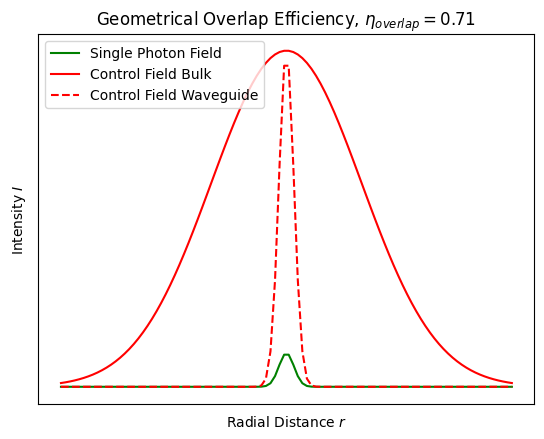

In [6]:
################### Compute Efficiency #####################

Cb = C(Pcb,Psb,Wb,Ww,r)

Cw = C(Pcw,Psb,Ww,Ww,r)

efficiency_bulk = Cb * overlap(Pcb,Psb,Wb,Ww,r)

efficiency_waveguide = Cb * overlap(Pcw,Psw,Ww,Ww,r)

print('Bulk Coupling Efficiency = ', efficiency_bulk)

print('Waveguide Coupling Efficiency = ', efficiency_waveguide)

################### Plot Overlaps #####################

plt.figure()
plt.title(r'Control-Single Photon Overlap Bulk, $\eta_{overlap} = %.2f$' %efficiency_bulk)

plt.plot(r,I(Pcb,Wb,r), 'r', label='Control Field')
plt.plot(r,I(Psb*5,Wb/4,r), 'g', label='Single Photon Field')
plt.axvline(x=Ww/2, c='b', alpha=0.2)
plt.axvline(x=-Ww/2, c='b', alpha=0.2)

plt.xlabel(r'Radial Distance $r$')
plt.ylabel(r'Intensity $I$')
plt.legend(loc= 'upper left')
plt.xticks([])
plt.yticks([])

plt.savefig('Max geometrical efficiency bulk Rabi normalized.png' , dpi=300)

plt.figure()
plt.title('Control-Single Photon Overlap Waveguide, $\eta_{overlap} = %.2f$' %efficiency_waveguide)

plt.plot(r,I(Pcw,Ww,r), 'r', label='Control Field')
plt.plot(r,I(Psw,Ww,r), 'g', label='Single Photon Field')
plt.axvline(x=Ww/2, c='b', alpha=0.2)
plt.axvline(x=-Ww/2, c='b', alpha=0.2)

plt.xlabel(r'Radial Distance $r$')
plt.ylabel(r'Intensity $I$')
plt.legend(loc= 'upper left')
plt.xticks([])
plt.yticks([])

#plt.savefig('Max geometrical efficiency waveguide Rabi normalized.png' , dpi=300)

plt.figure()
plt.title(r'Geometrical Overlap Efficiency, $\eta_{overlap} = %.2f$' %efficiency_waveguide)

plt.plot(r,I(Psb,Ww,r), 'g', label='Single Photon Field')
plt.plot(r,I(Pcb,Wb,r), 'r', label='Control Field Bulk')
plt.plot(r,I(Pcw,Ww,r), 'r--', label='Control Field Waveguide')


#plt.yscale('symlog')

plt.xlabel(r'Radial Distance $r$')
plt.ylabel(r'Intensity $I$')
plt.legend(loc= 'upper left')
plt.xticks([])
plt.yticks([])